In [1]:
print("""
Immadi Shyam Prasad    (AM.EN.U4CSE19164)
Bonthu Kireeti (AM.EN.U4CSE19115)
Manyam Mahadeva Reddy    (AM.EN.U4CSE19134)
""")



Immadi Shyam Prasad    (AM.EN.U4CSE19164)
Bonthu Kireeti (AM.EN.U4CSE19115)
Manyam Mahadeva Reddy    (AM.EN.U4CSE19134)



In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import random_split
from torch.utils.data import SubsetRandomSampler
from random import sample


import matplotlib.pyplot as plt

import glob
from PIL import Image as I

import pandas as pd

import os

import numpy as np

import timeit





In [2]:
pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/project1'

In [3]:


#https://www.kaggle.com/c/state-farm-distracted-driver-detection/data

#path of test,train,validation
train_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/imgs1/train"
test_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/imgs1/test"
val_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/imgs1/val"



mean = [0.3124, 0.3782, 0.3708] # found by caliculation net.batch_mean_and_sd(train_loader)
std = [0.2778, 0.3213, 0.3222]

#data argumentaion resizing,normalizing,converting to tensor

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),
    torch.Tensor(std))
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),
    torch.Tensor(std))
])
val_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),
    torch.Tensor(std))
])


train_dataset = datasets.ImageFolder(root=train_dataset_path,transform=train_transforms)
test_dataset = datasets.ImageFolder(root=test_dataset_path,transform=test_transforms)
val_dataset = datasets.ImageFolder(root=val_dataset_path,transform=val_transforms)

#data loading
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=10 ,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=10 ,shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,batch_size=10 ,shuffle=True)





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1, 6, 9, 6, 0, 5])
torch.Size([18, 50176])


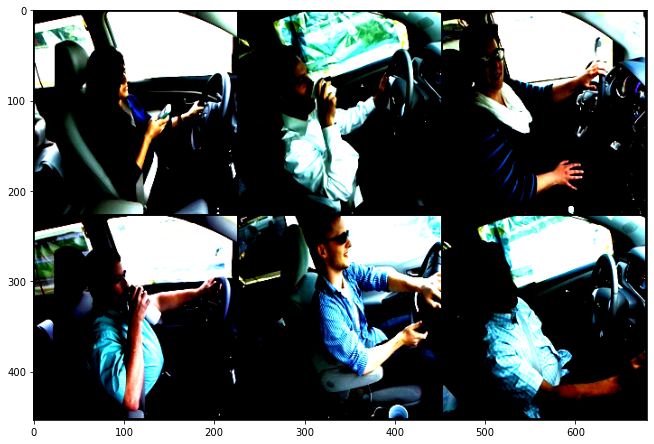

In [4]:
#function for printing images in grid
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size=6,shuffle=True)
  for data in loader:
    images , labels = data
    break
  print(labels)
  print(images.view(-1,224*224).shape)
  grid = torchvision.utils.make_grid(images,nrow=3)
  plt.figure(figsize=(11,11))
  plt.imshow(np.transpose(grid,(1,2,0)))
  plt.show()
  

show_transformed_images(train_dataset)

In [5]:
torch.cuda.is_available()

True

In [6]:
def my_plot(epochs, loss,title1,x_label1,y_label1):
    plt.plot(epochs, loss)
    plt.title(title1)
    plt.xlabel(x_label1)
    plt.ylabel(y_label1)
    return plt.show()
def just_plot(accu,accu1,title1,y_label1):
    epochs = range(1,4)
    plt.plot(epochs, accu, 'g', label='Training accuracy')
    plt.plot(epochs, accu1, 'b', label='validation accuracy')
    plt.title(title1)
    plt.xlabel('Epochs')
    plt.ylabel(y_label1)
    plt.legend()
    return plt.show()

In [7]:


num_classes = 10
net = torchvision.models.alexnet()
net.fc = nn.Linear(100, num_classes)
gpu_net = net.to('cuda')

import torch.optim as optim
from sklearn.metrics import accuracy_score

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(gpu_net.parameters(), lr=0.001, momentum=0.9, nesterov=True)


In [8]:



train_loss=  []
train_accuracy=[]

num_epochs = 3
for epoch in range(num_epochs):  # loop over the dataset multiple times
    epoch_loss= []
    running_train_loss = 0.0
    total=0
    correct = 0
    print('train load')
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = gpu_net(inputs)
        
        loss = criterion(outputs, labels)
        epoch_loss.append(loss.item())
        
        
        loss.backward()
        optimizer.step()
        
        for idx, k in enumerate(outputs):
          if torch.argmax(k) == labels[idx]:
            correct += 1
          total += 1
    
        # print statistics
        running_train_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] Train loss: %.3f' %
                  (epoch + 1, i + 1, running_train_loss / 50))
            running_train_loss = 0.0
            
    train_accuracy.append(round(correct/total,3))
    train_loss.append(sum(epoch_loss)/len(epoch_loss))
    running_val_loss = 0.0



print('Finished Training')


train load


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,    50] Train loss: 6.873
[1,   100] Train loss: 5.845
[1,   150] Train loss: 2.749
[1,   200] Train loss: 2.444
[1,   250] Train loss: 2.447
[1,   300] Train loss: 2.436
[1,   350] Train loss: 2.381
[1,   400] Train loss: 2.349
[1,   450] Train loss: 2.403
[1,   500] Train loss: 2.335
[1,   550] Train loss: 2.320
[1,   600] Train loss: 2.218
[1,   650] Train loss: 2.141
[1,   700] Train loss: 1.991
[1,   750] Train loss: 1.967
[1,   800] Train loss: 1.836
[1,   850] Train loss: 1.794
[1,   900] Train loss: 1.773
[1,   950] Train loss: 1.655
[1,  1000] Train loss: 1.656
[1,  1050] Train loss: 1.631
[1,  1100] Train loss: 1.537
[1,  1150] Train loss: 1.511
[1,  1200] Train loss: 1.400
train load
[2,    50] Train loss: 1.273
[2,   100] Train loss: 1.289
[2,   150] Train loss: 1.207
[2,   200] Train loss: 1.220
[2,   250] Train loss: 1.226
[2,   300] Train loss: 1.022
[2,   350] Train loss: 0.918
[2,   400] Train loss: 0.987
[2,   450] Train loss: 0.996
[2,   500] Train loss: 0.982
[2,

In [9]:
val_loss=  []
val_accuracy=[]

num_epochs = 3
for epoch in range(num_epochs):
    print('val load')
    epoch_loss= []
    running_val_loss = 0.0
    correct = 0
    total=0
    for i, data in enumerate(val_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = gpu_net(inputs)
        
        loss = criterion(outputs, labels)
        epoch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        for idx, j in enumerate(outputs):
          if torch.argmax(j) == labels[idx]:
            correct += 1
          total += 1
        
        running_train_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] Train loss: %.3f' %
                  (epoch + 1, i + 1, running_train_loss / 50))
            running_train_loss = 0.0


    val_accuracy.append(round(correct/total,3))
    val_loss.append(sum(epoch_loss)/len(epoch_loss))
    running_val_loss = 0.0
print('validation')

val load
[1,    50] Train loss: 0.453
[1,   100] Train loss: 0.301
[1,   150] Train loss: 0.279
[1,   200] Train loss: 0.326
[1,   250] Train loss: 0.265
[1,   300] Train loss: 0.339
val load
[2,    50] Train loss: 0.448
[2,   100] Train loss: 0.150
[2,   150] Train loss: 0.250
[2,   200] Train loss: 0.225
[2,   250] Train loss: 0.197
[2,   300] Train loss: 0.208
val load
[3,    50] Train loss: 0.425
[3,   100] Train loss: 0.190
[3,   150] Train loss: 0.138
[3,   200] Train loss: 0.150
[3,   250] Train loss: 0.192
[3,   300] Train loss: 0.192
validation


In [11]:
print(train_accuracy,val_accuracy)

[0.232, 0.692, 0.864] [0.906, 0.935, 0.946]


In [12]:
print(train_loss,val_loss)

[2.385819746556337, 0.8672663599325865, 0.41273387137468165] [0.2977081421098237, 0.21012411083836632, 0.17033227367585466]


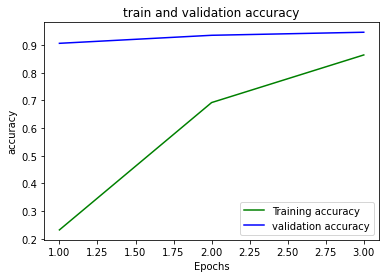

In [13]:
just_plot(train_accuracy, val_accuracy,"train and validation accuracy","accuracy")

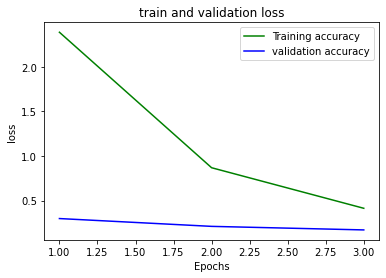

In [14]:
just_plot(train_loss, val_loss,"train and validation loss","loss")

In [15]:
#testing model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = gpu_net(x.to('cuda'))
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1
    print('accuracy:\t',round(correct/total,3))

accuracy:	 0.937


In [16]:
x, y = next(iter(test_loader)) 

In [17]:
x[0]

tensor([[[-0.8987, -0.8987, -0.8987,  ...,  2.1928,  2.2069,  1.8964],
         [-0.8987, -0.8987, -0.8987,  ...,  2.0940,  2.2493,  2.2493],
         [-0.8987, -0.8987, -0.8987,  ...,  1.8540,  2.0517,  2.1505],
         ...,
         [-0.7293, -0.7575, -0.7999,  ..., -0.9693, -0.9834, -0.9834],
         [-0.7716, -0.7999, -0.8422,  ..., -0.9834, -0.9834, -0.9834],
         [-0.8563, -0.8846, -0.9128,  ..., -0.9834, -0.9834, -0.9834]],

        [[-0.9696, -0.9696, -0.9696,  ...,  1.9231,  1.8742,  1.5813],
         [-0.9696, -0.9696, -0.9696,  ...,  1.8620,  1.9231,  1.9109],
         [-0.9696, -0.9696, -0.9696,  ...,  1.7034,  1.8376,  1.8986],
         ...,
         [-0.7621, -0.7865, -0.8231,  ..., -1.0672, -1.0795, -1.0672],
         [-0.7987, -0.8231, -0.8598,  ..., -1.0795, -1.0795, -1.0672],
         [-0.8720, -0.8964, -0.9208,  ..., -1.0795, -1.0795, -1.0672]],

        [[-1.0048, -1.0048, -1.0048,  ...,  1.6729,  1.6972,  1.4538],
         [-1.0048, -1.0048, -1.0048,  ...,  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(8)


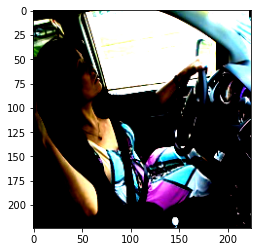

In [18]:
#checking for single images

print(y[8])
plt.imshow(np.transpose(x[8],(1,2,0)))
plt.show()

In [19]:
output = gpu_net(x.to('cuda'))
print(torch.max(output.data,1))
for idx, i in enumerate(output):
    if torch.argmax(i) == y[idx]:
        print('  correct',torch.argmax(i),y[idx])
    else:
        print('uncorrect',torch.argmax(i),y[idx])

torch.return_types.max(
values=tensor([17.5003, 28.5840, 41.8555, 18.6444, 28.8190, 28.0235, 20.8243, 21.7966,
        25.3960, 29.9994], device='cuda:0'),
indices=tensor([3, 4, 6, 9, 3, 3, 7, 7, 8, 7], device='cuda:0'))
uncorrect tensor(3, device='cuda:0') tensor(0)
  correct tensor(4, device='cuda:0') tensor(4)
  correct tensor(6, device='cuda:0') tensor(6)
  correct tensor(9, device='cuda:0') tensor(9)
  correct tensor(3, device='cuda:0') tensor(3)
  correct tensor(3, device='cuda:0') tensor(3)
  correct tensor(7, device='cuda:0') tensor(7)
  correct tensor(7, device='cuda:0') tensor(7)
  correct tensor(8, device='cuda:0') tensor(8)
  correct tensor(7, device='cuda:0') tensor(7)
